## Competition Description - Titanic - Predict Who Lives and Who Does Not! ##
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

<img src="files/RMS_Titanic.jpg">

## Notebook Contents - Purpose, Motivation, and Summary ##



## CODE BEGINS HERE ##

### (1.) Load the Training & Testing Data ###

In [1]:
import pandas as pd
import numpy as np

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
nameId=test_data['PassengerId']

train_data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### One-hot Encoding Categorical Data ###
Here, we are establishing which columns in our dataaset are categorical and one-hot encoding them. We create separate classes for Pclass =1,2,3, gender, and where they embarked from. After creating the one-hot-encoded columns, we drop the original column and all others, like Cabin, PassengerId that we deem to have little predictive value due to missing data or for other reasons.

In [2]:
#Convert Categorical Variables into Categories & One-hot Encode Them; Remove Variables unrelated like 
dummy_fields = ['Sex','Embarked','Pclass']


for each in dummy_fields:
    train_data[each].astype('category')
    test_data[each].astype('category')
    
    dummies_train = pd.get_dummies(train_data[each],prefix = each, drop_first = False)
    dummies_test = pd.get_dummies(test_data[each],prefix = each, drop_first = False)

    train_data = pd.concat([train_data, dummies_train],axis=1)
    test_data = pd.concat([test_data, dummies_test],axis=1)
    
#Drop columns on training & testing datasets
fields_to_drop = ['Sex','Embarked','Ticket','Cabin','PassengerId','Pclass']

train_data=train_data.drop(columns=fields_to_drop, axis =1)
test_data=test_data.drop(columns=fields_to_drop, axis =1)

### (2.) Data Preprocessing Steps ###
#### Modify Age Column - for NaN, Feature Engineering

Age data is missing for approximately 20% of all passenegers on the Titanic. Simply using the average could significantly throw off our Neural Network for optimizing the weights and getting a good probability that a person survived or not. Previous submissions found patterns in Name and Fare data, leading to the grouping of different families and/or nannies. By realizing, for example, a mother is traveling with children that seem to be missing age data, we can set a lower value of Y to approximate what this age might be. From inspection of the data, there seems to be a pattern for young boys, where their Name data also contains the string, Master, vs. Mr for adult males (Age > 15 years old). 

In [3]:
#Replace NaNs with average age value; 177 NaNs
avg_age_train = int(round(train_data['Age'].mean()))
avg_age_test = int(round(test_data['Age'].mean()))

#Check if Age data contains NaNs; approximately 20% of the data does
numNaNsAge=train_data['Age'].isnull().sum()

#Check if Fare data contains NaNs
numNaNsFare=train_data['Fare'].isnull().sum()
numNaNsFare

numNaNsFare_test=test_data['Fare'].isnull().sum()
avg_fare_test = int(round(test_data['Fare'].mean()))



train_data.head()
### Getting An Approximation for Age ###

conditions_train = [(train_data['Name'].str.contains('Master')==True) & (train_data['Age'].isnull()==True),
             (train_data['Name'].str.contains('Mrs.')==True) & (train_data['Age'].isnull()==True),
             (train_data['Name'].str.contains('Mr.')==True) & (train_data['Age'].isnull()==True),
            (train_data['Name'].str.contains('Miss')==True) & (train_data['Age'].isnull()==True),
             (train_data['Age'].isnull()==True)
             ]
choices = [8, avg_age_train, avg_age_train,avg_age_train,avg_age_train]
train_data['Age']=np.select(conditions_train, choices, default = train_data['Age'])
train_data=train_data.drop('Name', axis =1)

conditions_test = [(test_data['Name'].str.contains('Master')==True) & (test_data['Age'].isnull()==True),
             (test_data['Name'].str.contains('Mrs.')==True) & (test_data['Age'].isnull()==True),
             (test_data['Name'].str.contains('Mr.')==True) & (test_data['Age'].isnull()==True),
            (test_data['Name'].str.contains('Miss')==True) & (test_data['Age'].isnull()==True),
             (test_data['Age'].isnull()==True)
             ]

conditions_test_fare = [(test_data['Fare'].isnull()==True)]
choices_test_fare = [avg_fare_test]
             
test_data['Age']=np.select(conditions_test, choices, default = test_data['Age'])
test_data=test_data.drop('Name', axis =1)

test_data['Fare']=np.select(conditions_test_fare, choices_test_fare, default = test_data['Fare'])





In [4]:
train_data['Age'].isnull().sum()
train_data.head()

,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,1,0,7.2500,0,1,0,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0,1,0,0
2,1,26.0,0,0,7.9250,1,0,0,0,1,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1,1,0,0
4,0,35.0,0,0,8.0500,0,1,0,0,1,0,0,1


### (3.) Prepare Continuous Input Variables Columns - Feature Scaling ###

After one-hot-encoding categorical data, we now turn our attention to rescale continuous feature data, such as Age, SibSp, Parch, and Fare, to be between 0 and 1. This prevents our Neural Network from assigning higher "weights" during back-propogation to these unscaled variables, which would lead to faulty predictions. Another method we present involves creating a standard normal distribution for each of these features. This involves creating new continuous variables with zero mean and a standard deviation of 1. The latter approach yielded higher accuracies on the training dataset. 

In [5]:
norm_columns = ['Age','SibSp','Parch','Fare'] 
scaled_features_train = {} #store scaling values for conversion back to original values later on
scaled_features_test = {} #store scaling values for conversion back to original values later on

#Continuous Variables are set to be between 0 & 1 # Yielded 90% test accuracy with 5,000 epochs #
#for each in norm_columns:
#    max_train, min_train =train_data[each].max(), train_data[each].min()
#    scaled_features_train[each]= [max_train , min_train]
#    train_data.loc[:,each] = (train_data[each])/(max_train-min_train)
#    
#    max_test, min_test =test_data[each].max(), test_data[each].min()
#    scaled_features_test[each]= [max_test , min_test]
#    test_data.loc[:,each] = (test_data[each])/(max_test-min_test)



#Continuous Variables are set to be between 0 & 1 and to have zero mean and a standard deviation of 1# Yielded 91% accuracy with 50 epochs
for each in norm_columns:
    mean_train, std_train =train_data[each].mean(), train_data[each].std()
    scaled_features_train[each]= [mean_train , std_train]
    train_data.loc[:,each] = (train_data[each] - mean_train)/std_train
    
    mean_test, std_test =test_data[each].mean(), test_data[each].std()
    scaled_features_test[each]= [mean_test , std_test]
    test_data.loc[:,each] = (test_data[each] - mean_test)/std_test


### Display a Sample of Our Preprocessed Input Data ###

Here we can see a sample of the preprocessed data that will be sent into our neural network. It is a mix of continuous and categorical data.

In [6]:
train_data.head()
test_data.head()

,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0.350568,-0.498872,-0.399769,-0.497826,0,1,0,1,0,0,0,1
1,1.325664,0.616254,-0.399769,-0.512676,1,0,0,0,1,0,0,1
2,2.495779,-0.498872,-0.399769,-0.464548,0,1,0,1,0,0,1,0
3,-0.234490,-0.498872,-0.399769,-0.482904,0,1,0,0,1,0,0,1
4,-0.624528,0.616254,0.619154,-0.417987,1,0,0,0,1,0,0,1


### (4.) Separate Inputs & Ouputs for the Training Dataset ###

In [7]:
train_inputs= train_data.drop(columns=['Survived'], axis = 1)
train_targets = train_data['Survived']

In [8]:
train_inputs.head()

,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,-0.585468,0.432550,-0.473408,-0.502163,0,1,0,0,1,0,0,1
1,0.637422,0.432550,-0.473408,0.786404,1,0,1,0,0,1,0,0
2,-0.279746,-0.474279,-0.473408,-0.488580,1,0,0,0,1,0,0,1
3,0.408130,0.432550,-0.473408,0.420494,1,0,0,0,1,1,0,0
4,0.408130,-0.474279,-0.473408,-0.486064,0,1,0,0,1,0,0,1


In [9]:
test_data.isnull().sum()


Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
Pclass_1      0
Pclass_2      0
Pclass_3      0
dtype: int64

### (5.) Construct Random Forest Binary Classification Algorithm ###

#### Convert panda dataframe training data into numpy arrays, the appropriate form for keras. ####

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score,f1_score, accuracy_score

forest_clf = RandomForestClassifier(random_state = 42)
# Separate data and one-hot encode the output# Separ 
# Note: We're also turning the data into numpy arrays, in order to train the model in Keras

features = np.array(train_inputs)
targets = np.array(train_targets)
features_test = np.array(test_data)

y_train_1 = (targets == 1)
y_train_0 = (targets == 0)
y_train = targets
print('These are our input features. They are now numpy arrays with 12 columns.')
print(features[:10])
print(" ")
print('These are our targets. Each row describes whether or not a passenger lives or dies.')
print(targets[:10])


forest_clf.fit(features, targets)
y_train_pred = cross_val_predict(forest_clf, features, targets, cv=3)
y_probas_forest = cross_val_predict(forest_clf, features, targets, cv=3, method='predict_proba')
y_probas_forest

These are our input features. They are now numpy arrays with 12 columns.
[[-0.58546824  0.43255043 -0.47340772 -0.50216314  0.          1.          0.
   0.          1.          0.          0.          1.        ]
 [ 0.63742222  0.43255043 -0.47340772  0.78640362  1.          0.          1.
   0.          0.          1.          0.          0.        ]
 [-0.27974563 -0.47427882 -0.47340772 -0.48857985  1.          0.          0.
   0.          1.          0.          0.          1.        ]
 [ 0.40813026  0.43255043 -0.47340772  0.42049407  1.          0.          0.
   0.          1.          1.          0.          0.        ]
 [ 0.40813026 -0.47427882 -0.47340772 -0.48606443  0.          1.          0.
   0.          1.          0.          0.          1.        ]
 [ 0.02597699 -0.47427882 -0.47340772 -0.47784805  0.          1.          0.
   1.          0.          0.          0.          1.        ]
 [ 1.86031268 -0.47427882 -0.47340772  0.39559138  0.          1.          0.
   

array([[ 1. ,  0. ],
       [ 0. ,  1. ],
       [ 0.6,  0.4],
       ..., 
       [ 0.8,  0.2],
       [ 0.8,  0.2],
       [ 0.8,  0.2]])

### (8.) Evaluate the Model - Use Confusion Matrix, ROC Curve, Etc. ###

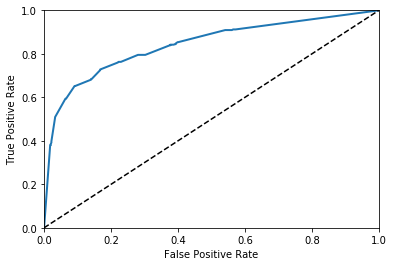

In [11]:
# Evaluating the model on the training and testing set
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr,tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

y_scores_forest = y_probas_forest[:,1]
fpr_forest, tpr_forest, thresholds = roc_curve(y_train, y_scores_forest)

plot_roc_curve(fpr_forest,tpr_forest, label='RandomForest')

### Build Confusion Matrix and Obtain Evaluation Metrics ###

In [12]:
conf_mx=confusion_matrix(y_train, y_train_pred)
accuracy_forest=accuracy_score(y_train, y_train_pred) 
precision_forest=precision_score(y_train, y_train_pred) 
recall_forest=recall_score(y_train, y_train_pred) # Only detect 68% of survivrors
f1_forest=f1_score(y_train, y_train_pred)

print(('{}% is the accuracy of our RandomForest Binary Classifier').format(accuracy_forest*100))
print(('{}% is the precision of our RandomForest Binary Classifier').format(precision_forest*100))
print(('{}% is the recall of our RandomForest Binary Classifier').format(recall_forest*100))
print(('{}% is the f1 score of our RandomForest Binary Classifier').format(f1_forest*100))

79.12457912457911% is the accuracy of our RandomForest Binary Classifier
75.0% is the precision of our RandomForest Binary Classifier
68.42105263157895% is the recall of our RandomForest Binary Classifier
71.55963302752295% is the f1 score of our RandomForest Binary Classifier


### Get ROC_AUC Score, or the ROC Area under the Curve score to determine algorithm's overall performance###


In [13]:
roc_auc_score(y_train, y_scores_forest)

0.84139157852128799

### Implement RandomizedSearchCV to optimize RandomForest Algorithm ###

In [17]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators':[1,10,100,1000], 'max_features':[2,4,6,8,10]},
    {'bootstrap':[False], 'n_estimators':[3,10], 'max_features':[2,3,4,10]}
]

forest_clf = RandomForestClassifier()
grid_search = GridSearchCV(forest_clf, param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(features, y_train)


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [1, 10, 100, 1000], 'max_features': [2, 4, 6, 8, 10]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4, 10]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

### Get the Best Combination of Parameters ###

In [18]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 10}

In [19]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=6, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [20]:
features_test

array([[  3.50567925e-01,  -4.98872207e-01,  -3.99768650e-01, ...,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00],
       [  1.32566370e+00,   6.16253902e-01,  -3.99768650e-01, ...,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00],
       [  2.49577863e+00,  -4.98872207e-01,  -3.99768650e-01, ...,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00],
       ..., 
       [  6.62598573e-01,  -4.98872207e-01,  -3.99768650e-01, ...,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00],
       [ -4.66553001e-04,  -4.98872207e-01,  -3.99768650e-01, ...,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00],
       [ -1.71663511e+00,   6.16253902e-01,   6.19153884e-01, ...,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00]])

In [21]:
final_model = grid_search.best_estimator_

prediction = final_model.predict(features_test)
prediction


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0,

### Error Analysis ###

In [22]:
conf_mx

array([[471,  78],
       [108, 234]])

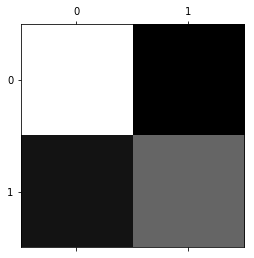

In [23]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

#### Prepare model for Export into Kaggle Submission Format ####

In [24]:
pred=pd.DataFrame(prediction)
pred = pd.concat([nameId, pred],axis=1)
pred['Survived'] = pred[0]
submission=pred.drop([0], axis =1)
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,0
7,899,0
8,900,0
9,901,0


### (9.) Export Dataframe as a csv file ###

In [139]:
submission.to_csv('Adrian_Lievano_Titanic_Submission_RandomForestwGridSearchCV', sep=',', index=False)

## Discussion ##

Deep learning algorithms are powerful; they are able to find patterns that you and I would have trouble with. The most significant challenge is that these types require massive amounts of data and tend to overfit to training data. Data quality is extremely important. By adding the simple modifier where 'Master' meant a young child, we increased our model with only 50 epochs and 8 batch_size. Consistent results that continuous variables rescaled as standard normal distributions increased test set accuracy.